In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('axes', labelsize=14)

def _extract_users_items_labels(data_pd):
    users, movies = \
        [np.squeeze(arr) for arr in np.split(data_pd.Id.str.extract('r(\d+)_c(\d+)').values.astype(int) - 1, 2, axis=-1)]
    ratings = data_pd.Prediction.values
    return pd.DataFrame.from_dict({"user_id": users, "movie_id": movies, "rating": ratings})

Bi_std = np.load("../save_dir/0_Bi_std.npy").ravel()
Bu_std = np.load("../save_dir/0_Bu_std.npy").ravel()
Q_std = np.load("../save_dir/0_Q_std.npy").mean(axis=1)
P_std = np.load("../save_dir/0_P_std.npy").mean(axis=1)
preds_std = np.load("../save_dir/0_preds_std.npy")
preds_std_user = preds_std.mean(axis=0)
preds_std_movie = preds_std.mean(axis=1)

train_data = _extract_users_items_labels(pd.read_csv("../data/data_train.csv"))


In [14]:
user_counts = train_data.groupby("user_id").count().reset_index(drop=True)[["movie_id"]].values.ravel()


In [15]:
movie_counts = train_data.groupby("movie_id").count().reset_index(drop=True)[["user_id"]].values.ravel()


Text(0, 0.5, "Std of 'P' parameters of the user")

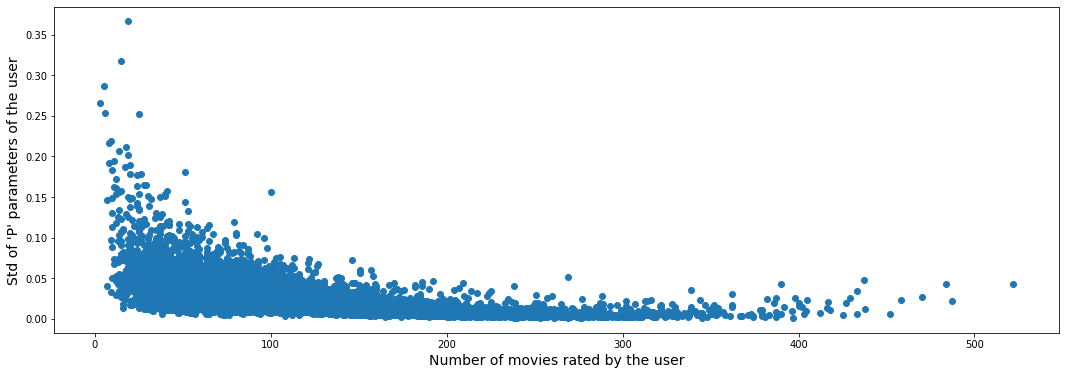

In [17]:
plt.figure(figsize=(18, 6))
plt.scatter(user_counts, P_std)
plt.xlabel("Number of movies rated by the user")
plt.ylabel("Std of 'P' parameters of the user")

Text(0, 0.5, "Std of 'Q' parameters of the movie")

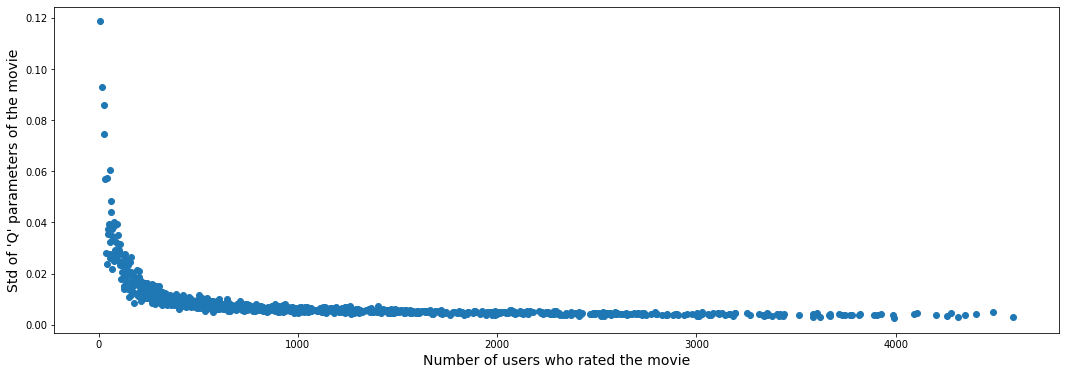

In [18]:
plt.figure(figsize=(18, 6))
plt.scatter(movie_counts, Q_std)
plt.xlabel("Number of users who rated the movie")
plt.ylabel("Std of 'Q' parameters of the movie")

Text(0, 0.5, "Std of 'Bu' parameters of this user")

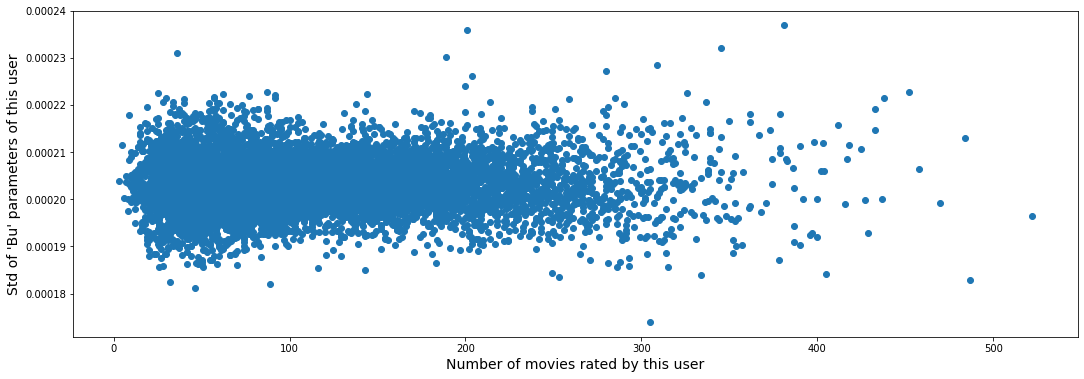

In [6]:
plt.figure(figsize=(18, 6))
plt.scatter(user_counts, Bu_std)
plt.xlabel("Number of movies rated by this user")
plt.ylabel("Std of 'Bu' parameters of this user")


Text(0, 0.5, "Std of 'Bi' parameters of the movie")

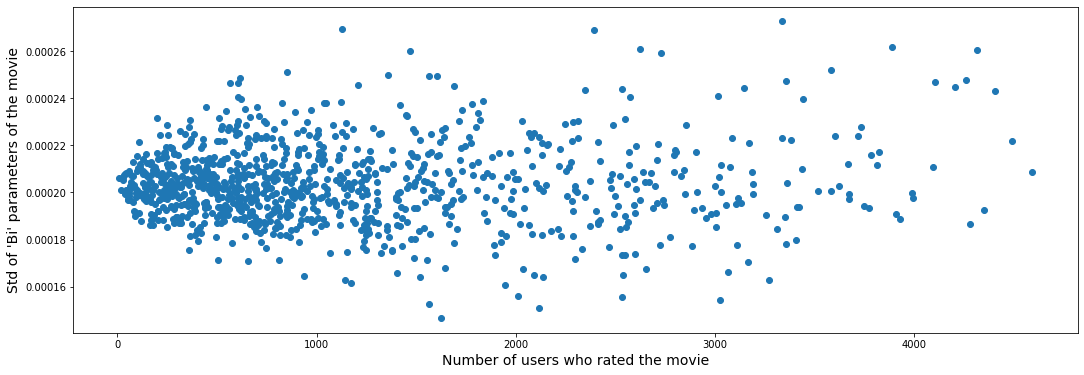

In [19]:
plt.figure(figsize=(18, 6))
plt.scatter(movie_counts, Bi_std)
plt.xlabel("Number of users who rated the movie")
plt.ylabel("Std of 'Bi' parameters of the movie")


Text(0, 0.5, 'Std of predictions for the user')

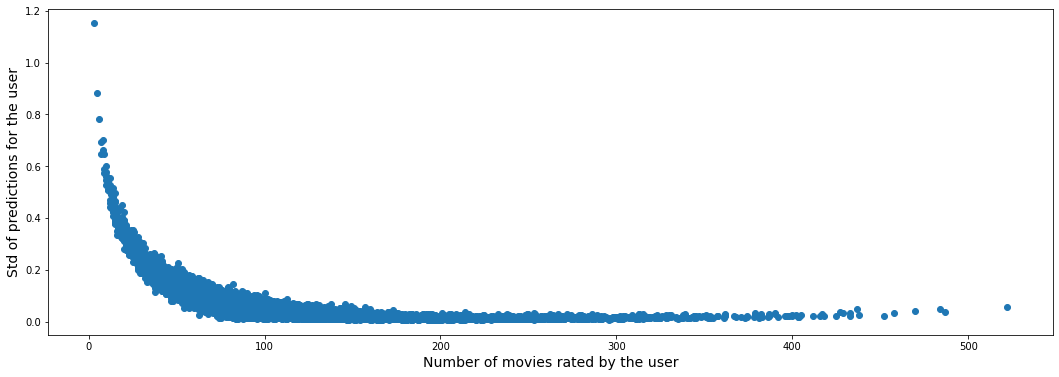

In [20]:
plt.figure(figsize=(18, 6))
plt.scatter(user_counts, preds_std_user)
plt.xlabel("Number of movies rated by the user")
plt.ylabel("Std of predictions for the user")


Text(0, 0.5, 'Std of predictions for the movie')

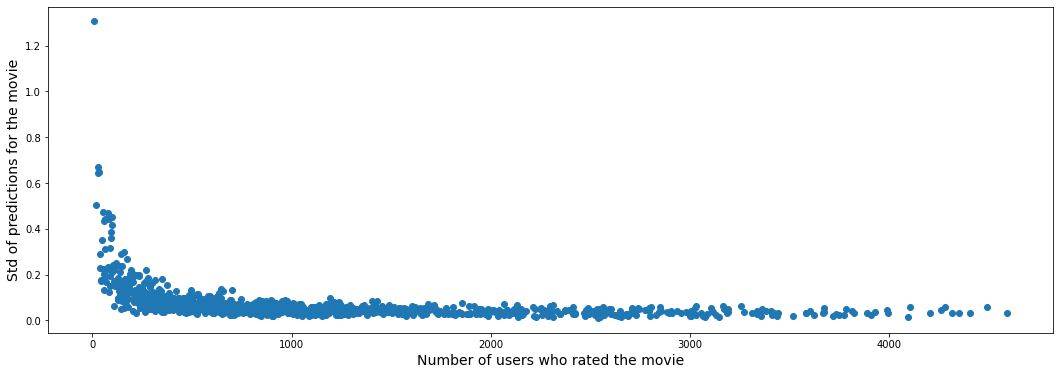

In [21]:
plt.figure(figsize=(18, 6))
plt.scatter(movie_counts, preds_std_movie)
plt.xlabel("Number of users who rated the movie")
plt.ylabel("Std of predictions for the movie")
